# LAB 4: Regresion


**Ingeniería Electrónica**

**Inteligencia Artificial**

**13/05/2022**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://github.com/dhyan6/data-science-projects/blob/main/kc_house_data.csv?raw=true'
houses = pd.read_csv(url)
print(houses.head())
print(houses.info())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  sqft_above  sqft_basement  zipcode  
0      7        1180              0    98178  
1      7        2170            400    98125  
2      6         770              0    98028  
3      7        1050            910    98136  
4      8        1680              0    98074  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bed

<AxesSubplot:>

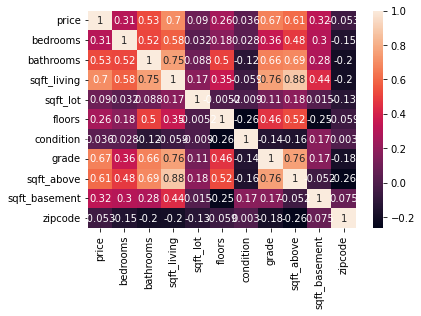

In [6]:
correlations = houses.corr()
sns.heatmap(correlations, annot=True)

<AxesSubplot:title={'center':'House Price vs Squared Feet'}, xlabel='Squared Feet', ylabel='House Price (in millions)'>

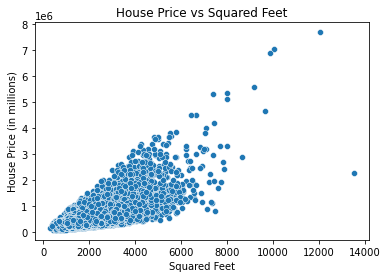

In [7]:
plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")
sns.scatterplot(x='sqft_living', y='price',
data=houses)

# Parte 1

In [23]:
# Importar el módulo train_test_split
from sklearn.model_selection import train_test_split

# Definir nuestras variables: predictora y objetivo
X = houses[['sqft_living']]
Y = houses ['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y)

-36881.022743081674
[277.32622299]


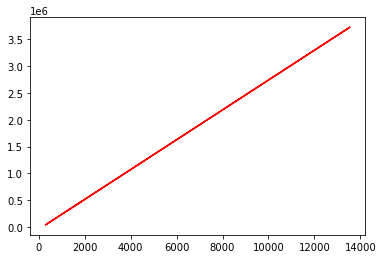

In [30]:
# Importar la librería
from sklearn.linear_model import LinearRegression

# Inicializar un objeto de modelo de regresión lineal
lr = LinearRegression()

# Ajustar el objeto del modelo de regresión lineal a nuestros datos
lr.fit(x_train, y_train)

# Imprimir la intersección y la pendiente del modelo
print(lr.intercept_)
print(lr.coef_)

# Mostrar recta de mejor ajuste
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r', label='Intercept: -39,163 \nSlope: 279.4')

# Parte 2

In [31]:
lr.predict([[4600]])

array([1238819.60298929])

# Parte 3

In [33]:
# Definir un conjunto de predicciones para Y según el subconjunto x_test
y_pred = lr.predict(x_test)

# Importar módulo
from sklearn.metrics import mean_squared_error

# Pasamos los valores de prueba y los valores predichos
mse = mean_squared_error(y_test, y_pred)

# Saquemos la raíz cuadrada
rmse = np.sqrt(mse)

# Imprimir el resultado
print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 274436.41191055515


In [34]:
# Importar módulo r2_score
from sklearn.metrics import r2_score
# Imprimir valor o puntaje R2
print(r2_score(y_test, y_pred))

0.49239038834539905
